# Statistical Power

## Introduction


You've started to investigate hypothesis testing, p-values and their use for accepting or rejecting the null hypothesis. With this, the power of a statistical test measures an experiment's ability to detect a difference, when one exists. In the case of testing whether a coin is fair, the power of our statistical test would be the probability of rejecting the null hypothesis "this coin is fair" when the coin was unfair. As you might assume, the power of this statistical test would thus depend on several factors including our p-value threshold for rejecting the null hypothesis, the size of our sample and the 'level of unfairness' of the coin in question.

## Objectives

You will be able to:

- Define power in relation to p-value and the null hypothesis 
- Describe the impact of sample size and effect size on power 
- Perform power calculation using SciPy and Python 
- Demonstrate the combined effect of sample size and effect size on statistical power using simulations 



## The power of a statistical test

The power of a statistical test is defined as the probability of rejecting the null hypothesis, given that it is indeed false. As with any probability, the power of a statistical test, therefore, ranges from 0 to 1, with 1 being a perfect test that guarantees rejecting the null hypothesis when it is indeed false. 

Intrinsically, this is related to $\beta$, the probability of type II errors. When designing a statistical test, a researcher will typically determine an acceptable $\alpha$, such as .05, the probability of type I errors. (Recall that type I errors are when the null-hypothesis is rejected when actually true.) From this given $\alpha$ value, an optimal threshold for rejecting the null-hypothesis can be determined. That is, for a given $\alpha$ value, you can calculate a threshold that maximizes the power of the test. For any given $\alpha$, $power = 1 - \beta$.


> Note: Ideally, $\alpha$ and $\beta$ would both be minimized, but this is often costly, impractical or impossible depending on the scenario and required sample sizes. 


## Effect size

The effect size is the magnitude of the difference you are testing between the two groups. Thus far, you've mainly been investigating the mean of a sample. For example, after flipping a coin n number of times, you've investigated using a t-test to determine whether the coin is a fair coin (p(heads)=0.5). To do this, you compared the mean of the sample to that of another sample, if comparing coins, or to a know theoretical distribution. Similarly, you might compare the mean income of a sample population to that of a census tract to determine if the populations are statistically different. In such cases, Cohen's D is typically the metric used as the effect size. 

Cohen's D is defined as:  $ d = \frac{m_1 - m_2}{s}$,  where $m_1$ and $m_2$ are the respective sample means and s is the overall standard deviation of the samples. 

> When looking at the difference of means of two populations, Cohen's D is equal to the difference of the sample means divided by the pooled standard deviation of the samples. The pooled standard deviation of the samples is the average spread of all data points in the two samples around their group mean.  


## Power analysis

Since $\alpha$, power, sample size, and effect size are all related quantities, you can take a look at some plots of the power of some t-tests, given varying sample sizes. This will allow you to develop a deeper understanding of how these quantities are related and what constitutes a convincing statistical test. There are three things to go into the calculation of power for a test. They are:

* alpha value
* effect size
* sample size   

A fantastic visual representation of these values' effect on one another can be found on [Kristoffer Magnusson's website](https://rpsychologist.com/d3/NHST/).

Let's look at how power might change in the context of varying effect size. To start, imagine the scenario of trying to detect whether or not a coin is fair. In this scenario, the null-hypothesis would be $H_0(heads) = 0.5$ because our assumption is that we are dealing with a fair coin. From here, the power will depend on both the sample size and the effect size (that is the threshold for the null hypothesis to be rejected). For example, if the alternative hypothesis has a large margin from the null-hypothesis such as $H_a(heads) = 0.8$ or $H_a(heads) = 0.9$ (large effect size), then there is a higher chance of rejecting the null-hypothesis (power is increased). If there is a smaller margin between the null hypothesis and an alternate hypothesis, an unfair coin where $P(heads)=.6$ for example (small effect size), there is a lower chance of rejecting the null hypothesis (power is reduced).

To start, you might choose an alpha value that you are willing to accept such as $\alpha=0.05$. From there, you can observe the power of various statistical tests against various sample and effect sizes.  

For example, if we wish to state the alternative hypothesis $H_a = .55$, then the effect size (using Cohen's D) would be:

$ d = \frac{m_1 - m_2}{s}$  
$ d = \frac{.55 - .5}{s}$

Furthermore, since we are dealing with a binomial variable, the standard deviation of the sample should follow the formula $\sqrt{n\bullet p(1-p)}$.  
So some potential effect size values for various scenarios might look like this:

In [1]:
import numpy as np
import pandas as pd

In [2]:
m1 = .55
m2 = .5
p = m2
rows = []
for n in [10, 20, 50, 500]:
    std = np.sqrt(n*p*(1-p))
    d = (m1-m2)/std
    rows.append({'Effect_Size': d, 'STD': std, 'Num_observations': n})
print('Hypothetical effect sizes for p(heads)=.55 vs p(heads)=.5')
pd.DataFrame(rows)

Hypothetical effect sizes for p(heads)=.55 vs p(heads)=.5


,Effect_Size,STD,Num_observations
0,0.031623,1.581139,10
1,0.022361,2.236068,20
2,0.014142,3.535534,50
3,0.004472,11.180340,500


As a general rule of thumb, all of these effect sizes are quite small. here's the same idea expanded to other alternative hypotheses:

In [3]:
m2 = .5
rows = {}
for n in [10, 20, 50, 500]:
    temp_dict = {}
    for m1 in [.51, .55, .6, .65, .7, .75, .8, .85, .9]:
        p = m1
        std = np.sqrt(n*p*(1-p))
        d = (m1-m2)/std
        temp_dict[m1] = d
    rows[n] = temp_dict
print('Hypothetical effect sizes for various alternative hypotheses')
df = pd.DataFrame.from_dict(rows, orient='index')
# df.index = [10,20,50, 500]
# df.index.name = 'Sample_Size'
# df.columns.name = 'Alternative Hypothesis'
df

Hypothetical effect sizes for various alternative hypotheses


,0.51,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
10,0.006326,0.031782,0.064550,0.099449,0.138013,0.182574,0.237171,0.309965,0.421637
20,0.004473,0.022473,0.045644,0.070321,0.097590,0.129099,0.167705,0.219179,0.298142
50,0.002829,0.014213,0.028868,0.044475,0.061721,0.081650,0.106066,0.138621,0.188562
500,0.000895,0.004495,0.009129,0.014064,0.019518,0.025820,0.033541,0.043836,0.059628


While a bit long winded, you can see that realistic effect sizes for this scenario could be anywhere from 0.05 (or lower) up to approximately .4.  

Now that you have some parameter estimates for $\alpha$ and the effect size, you can map subsequent relationships for the power and sample size. Again, this is because any three of these quantities (alpha, effect size, sample size and power) will determine the fourth.  

As you've also seen, a common statistical test for comparing sample means is the t-test. Statsmodels has some convenient build in functions for calculating the power of a t-test and plotting power curves. Take a look:

In [1]:
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots

In [2]:
power_analysis = TTestIndPower()

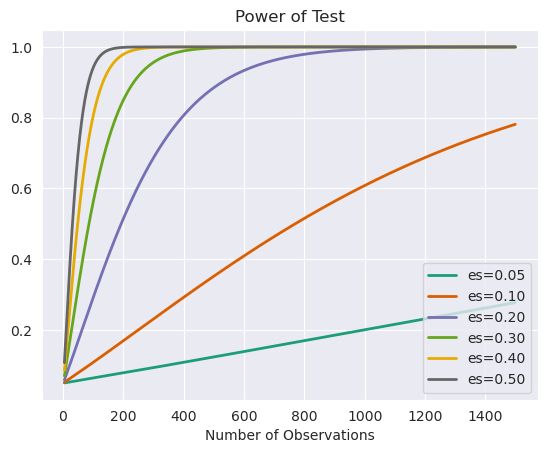

In [7]:
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()

As this should demonstrate, detecting small perturbances can be quite difficult! 

Similarly, just because a t-test has an incredibly small p-value doesn't necessarily imply a strong statistical test. As is mentioned in the article *Using Effect Size - or Why the P Value Is Not Enough*, referenced below, using incredibly large sample sizes such as 22,000 can make even the most trivial effect size statistically significant. Realizing these reciprocal relationships and considering all 4 parameters: alpha, effect size, sample size, and power are all important when interpreting the results (such as the p-value) of a statistical test.

In addition to plotting a full curve, you can also calculate specific values. Simply don't specify one of the four parameters.

In [8]:
# Calculate power
power_analysis.solve_power(effect_size=.2, nobs1=80, alpha=.05)

0.24175778678474177

In [9]:
# Calculate sample size required
power_analysis.solve_power(effect_size=.2, alpha=.05, power=.8)

393.4056989990335

In [10]:
# Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power_analysis.solve_power(nobs1=25, alpha=.05, power=.8)

0.8087077886680412

In [11]:
# Calculate alpha (less traditional)
power_analysis.solve_power(nobs1=25, effect_size=.3, power=.8)

0.6613634273431555

You can also simulate your own data to verify results:

In [29]:
import scipy.stats as stats
def run_ttest_sim(p1, p2, std, nobs, alpha=0.05, n_sim=10**5):
    """p1 and p2 are the underlying means probabilities for 2 normal variables
    Samples will be generated using these parameters."""
    # Calculate Normalized Effect Size
    effect_size = np.abs(p1-p2)/std
    
    # Run a Simulation
    # Initialize array to store results
    p = (np.empty(n_sim))
    p.fill(np.nan)

    #  Run a for loop for range of values in n_sim
    for s in range(n_sim):
        control = np.random.normal(loc= p1, scale=std, size=nobs)
        experimental = np.random.normal(loc= p2, scale=std, size=nobs)
        t_test = stats.ttest_ind(control, experimental)
        p[s] = t_test[1]
    
    num_null_rejects = np.sum(p < alpha)
    power = num_null_rejects/n_sim
    # Store results
    stat_dict = {'alpha':alpha,
                 'nobs':nobs,
                 'effect_size':effect_size,
                 'power': power}
    return stat_dict

run_ttest_sim(.5, .7, 1, 50)

{'alpha': 0.05,
 'nobs': 50,
 'effect_size': 0.19999999999999996,
 'power': 0.16393}

And going back to the full stats model implementation for verification:

In [30]:
power_analysis.solve_power(nobs1=50, effect_size=0.19999999999999996, alpha=0.05)

0.1676754863454749

In [31]:
power_analysis.solve_power(nobs1=50, effect_size=0.19999999999999996, power=0.16719)

0.049779515826212206

In [32]:
power_analysis.solve_power(nobs1=50, power=0.16719, alpha=0.05)

0.19959710069445308

In [33]:
power_analysis.solve_power(power=0.16719, effect_size=0.19999999999999996, alpha=0.05)

49.80313313853301

## Additional Resources

* [Statsmodels documentation](http://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.html)
* [Using Effect Size—or Why the P Value Is Not Enough](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/)
* [Understanding Statistical Power and Significance Testing - an interactive visualization](https://rpsychologist.com/d3/NHST/)

## Summary

In this lesson, you learned about the idea of "statistical power" and how sample size, alpha, and effect size impact the power of an experiment. Remember, the power of a statistical test is the probability of rejecting the null hypothesis when it is indeed false.